In [1]:
!pip install cvxopt

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers

In [2]:
## data

# Sample data
X = np.array([[2, 2],
              [2, 0],
              [0, 0],
              [1, 1]])
y = np.array([1, 1, -1, -1])

In [3]:
# Compute the kernel (linear in this case)
K = np.dot(X, X.T)

# Construct the matrices for the quadratic programming problem
P = matrix(np.outer(y, y) * K, tc='d')
q = matrix(-np.ones(len(X)), tc='d')
A = matrix(y, (1, len(X)), tc='d')
b = matrix(0.0, tc='d')
G = matrix(-np.eye(len(X)), tc='d')
h = matrix(np.zeros(len(X)), tc='d')

# Solve the quadratic programming problem
solution = solvers.qp(P, q, G, h, A, b)

     pcost       dcost       gap    pres   dres
 0: -1.2800e+00 -3.2000e+00  8e+00  2e+00  2e+00
 1: -2.1716e+00 -2.6261e+00  7e-01  2e-01  2e-01
 2: -1.9996e+00 -2.0114e+00  1e-02  4e-16  1e-15
 3: -2.0000e+00 -2.0001e+00  1e-04  1e-15  5e-16
 4: -2.0000e+00 -2.0000e+00  1e-06  4e-16  5e-16
Optimal solution found.


In [4]:
solution

{'x': <4x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <4x1 matrix, tc='d'>,
 'z': <4x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 1.1752696158226515e-06,
 'relative gap': 5.876348194707588e-07,
 'primal objective': -1.999999960657767,
 'dual objective': -2.0000011359273815,
 'primal infeasibility': 4.440892098501624e-16,
 'dual infeasibility': 4.655145010143737e-16,
 'primal slack': 1.9671036132199486e-08,
 'dual slack': 1.9315903190916117e-07,
 'iterations': 4}

In [11]:
# Extract Lagrange multipliers
alphas = np.array(solution['x'])

# Identify support vectors
support_vectors = np.where(alphas > 1e-5)[0]
support_vectors

array([0, 1, 3])

In [6]:
# Calculate the weight vector
w = np.sum(alphas[support_vectors] * y[support_vectors, None] * X[support_vectors], axis=0)

# Calculate the bias term
b = y[support_vectors] - np.dot(X[support_vectors], w)
bias = np.mean(b)

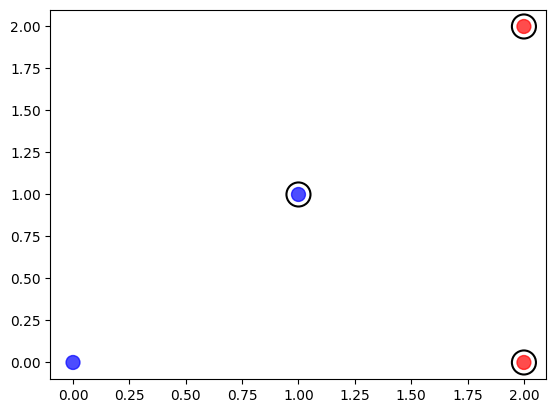

In [7]:
# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', alpha=0.7)

# Highlight the support vectors
plt.scatter(X[support_vectors][:, 0], X[support_vectors][:, 1], s=300,
            facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')

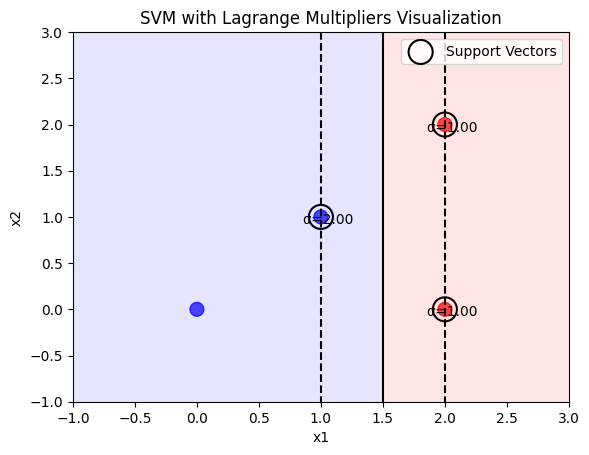

In [20]:
# Plotting the data points
plt.scatter(X[:, 0], X[:, 1], c=y, s=100, cmap='bwr', alpha=0.7)

# Highlight the support vectors
plt.scatter(X[support_vectors][:, 0], X[support_vectors][:, 1], s=300,
            facecolors='none', edgecolors='k', linewidths=1.5, label='Support Vectors')
# Plot the decision boundary and margins
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], w) + bias
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, levels=[-1, 0, 1], linestyles=['--', '-', '--'], colors='k')
plt.contourf(xx, yy, Z, levels=[-10, 0, 10], alpha=0.1, colors=['blue', 'red'])

# Annotating Lagrange multipliers on support vectors
for i in support_vectors:
    plt.annotate(f'α={alphas[i][0]:.2f}', (X[i, 0], X[i, 1]), textcoords="offset points", xytext=(5,-5), ha='center')

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.legend()
plt.title('SVM with Lagrange Multipliers Visualization')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [15]:
w

array([2.00000057e+00, 5.69292471e-08])

In [10]:
support_vectors

array([0, 1, 3])

<Axes: >

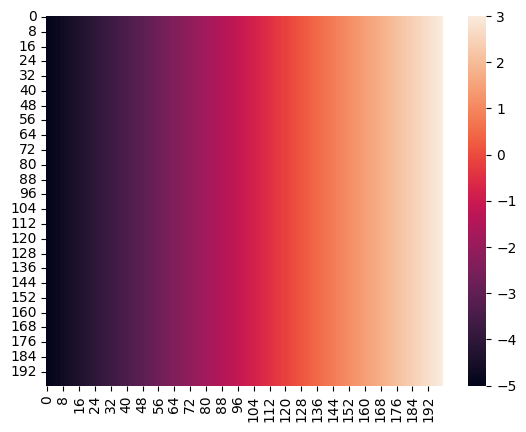

In [16]:
import seaborn as sns
sns.heatmap(Z)

<Axes: >

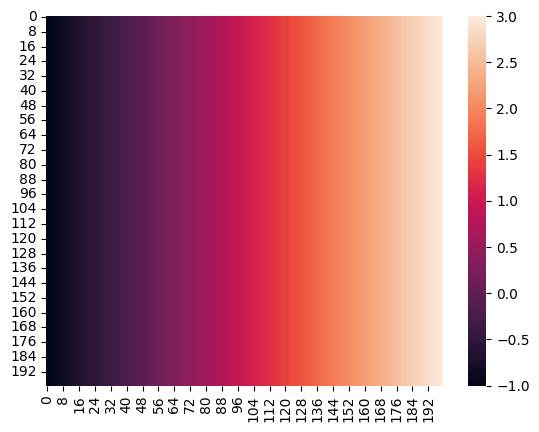

In [17]:
sns.heatmap(xx)

<Axes: >

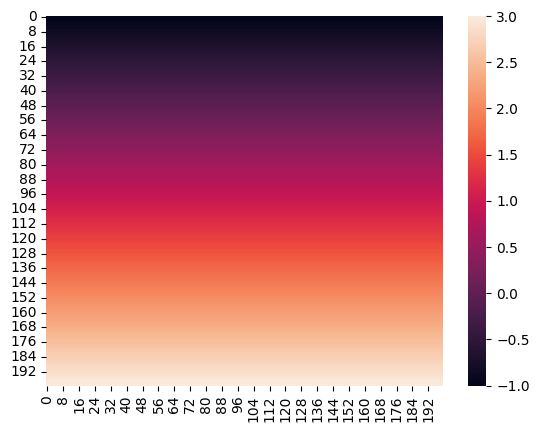

In [18]:
sns.heatmap(yy)